In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

In [49]:
data = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
df=data.copy()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [50]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [52]:
df = df.drop_duplicates()

In [53]:
df = df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [54]:
missing_values = df.isna().sum()
print(missing_values)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [55]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


In [56]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 28501
Variables: 12
cat_cols: 5
num_cols: 7
cat_but_car: 0
num_but_cat: 1


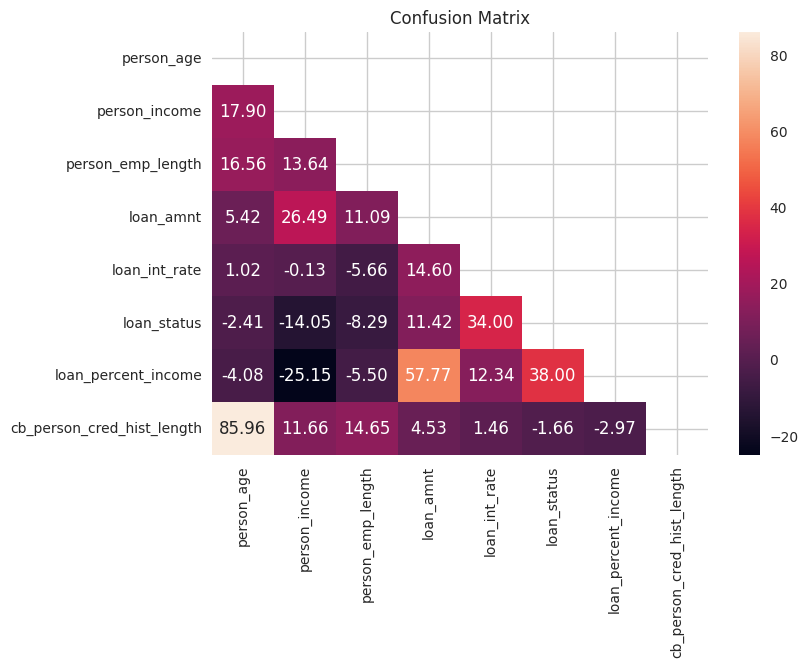

['cb_person_cred_hist_length']

In [57]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Select only the numeric columns from the DataFrame
    numeric_dataframe = dataframe.select_dtypes(include=['number'])
    
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr * 100, annot= True, fmt='.2f', mask=mask)
        plt.title('Confusion Matrix')
        plt.show()
    
    return drop_list

# Usage example:
high_correlated_cols(df, plot=True)

Text(0.5, 1.0, 'Loan Status')

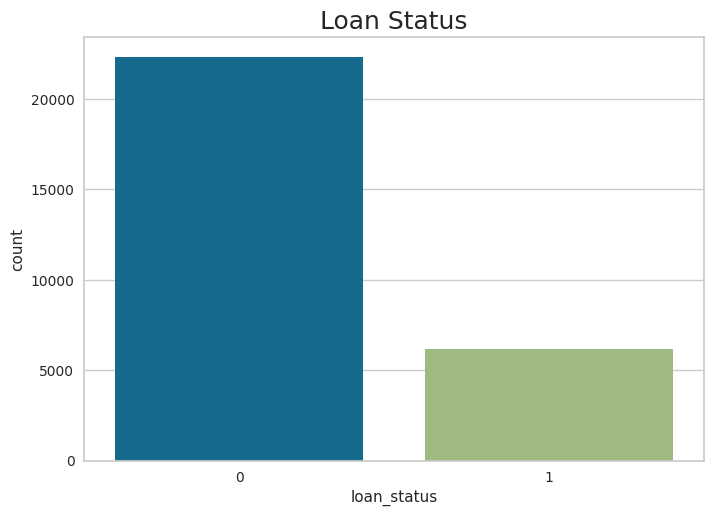

In [58]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status', fontsize=18)

Text(0.5, 1.0, 'Home ownership')

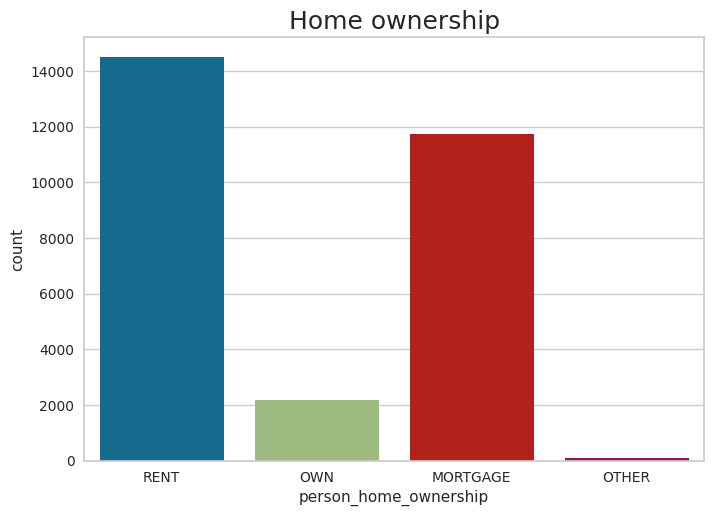

In [59]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

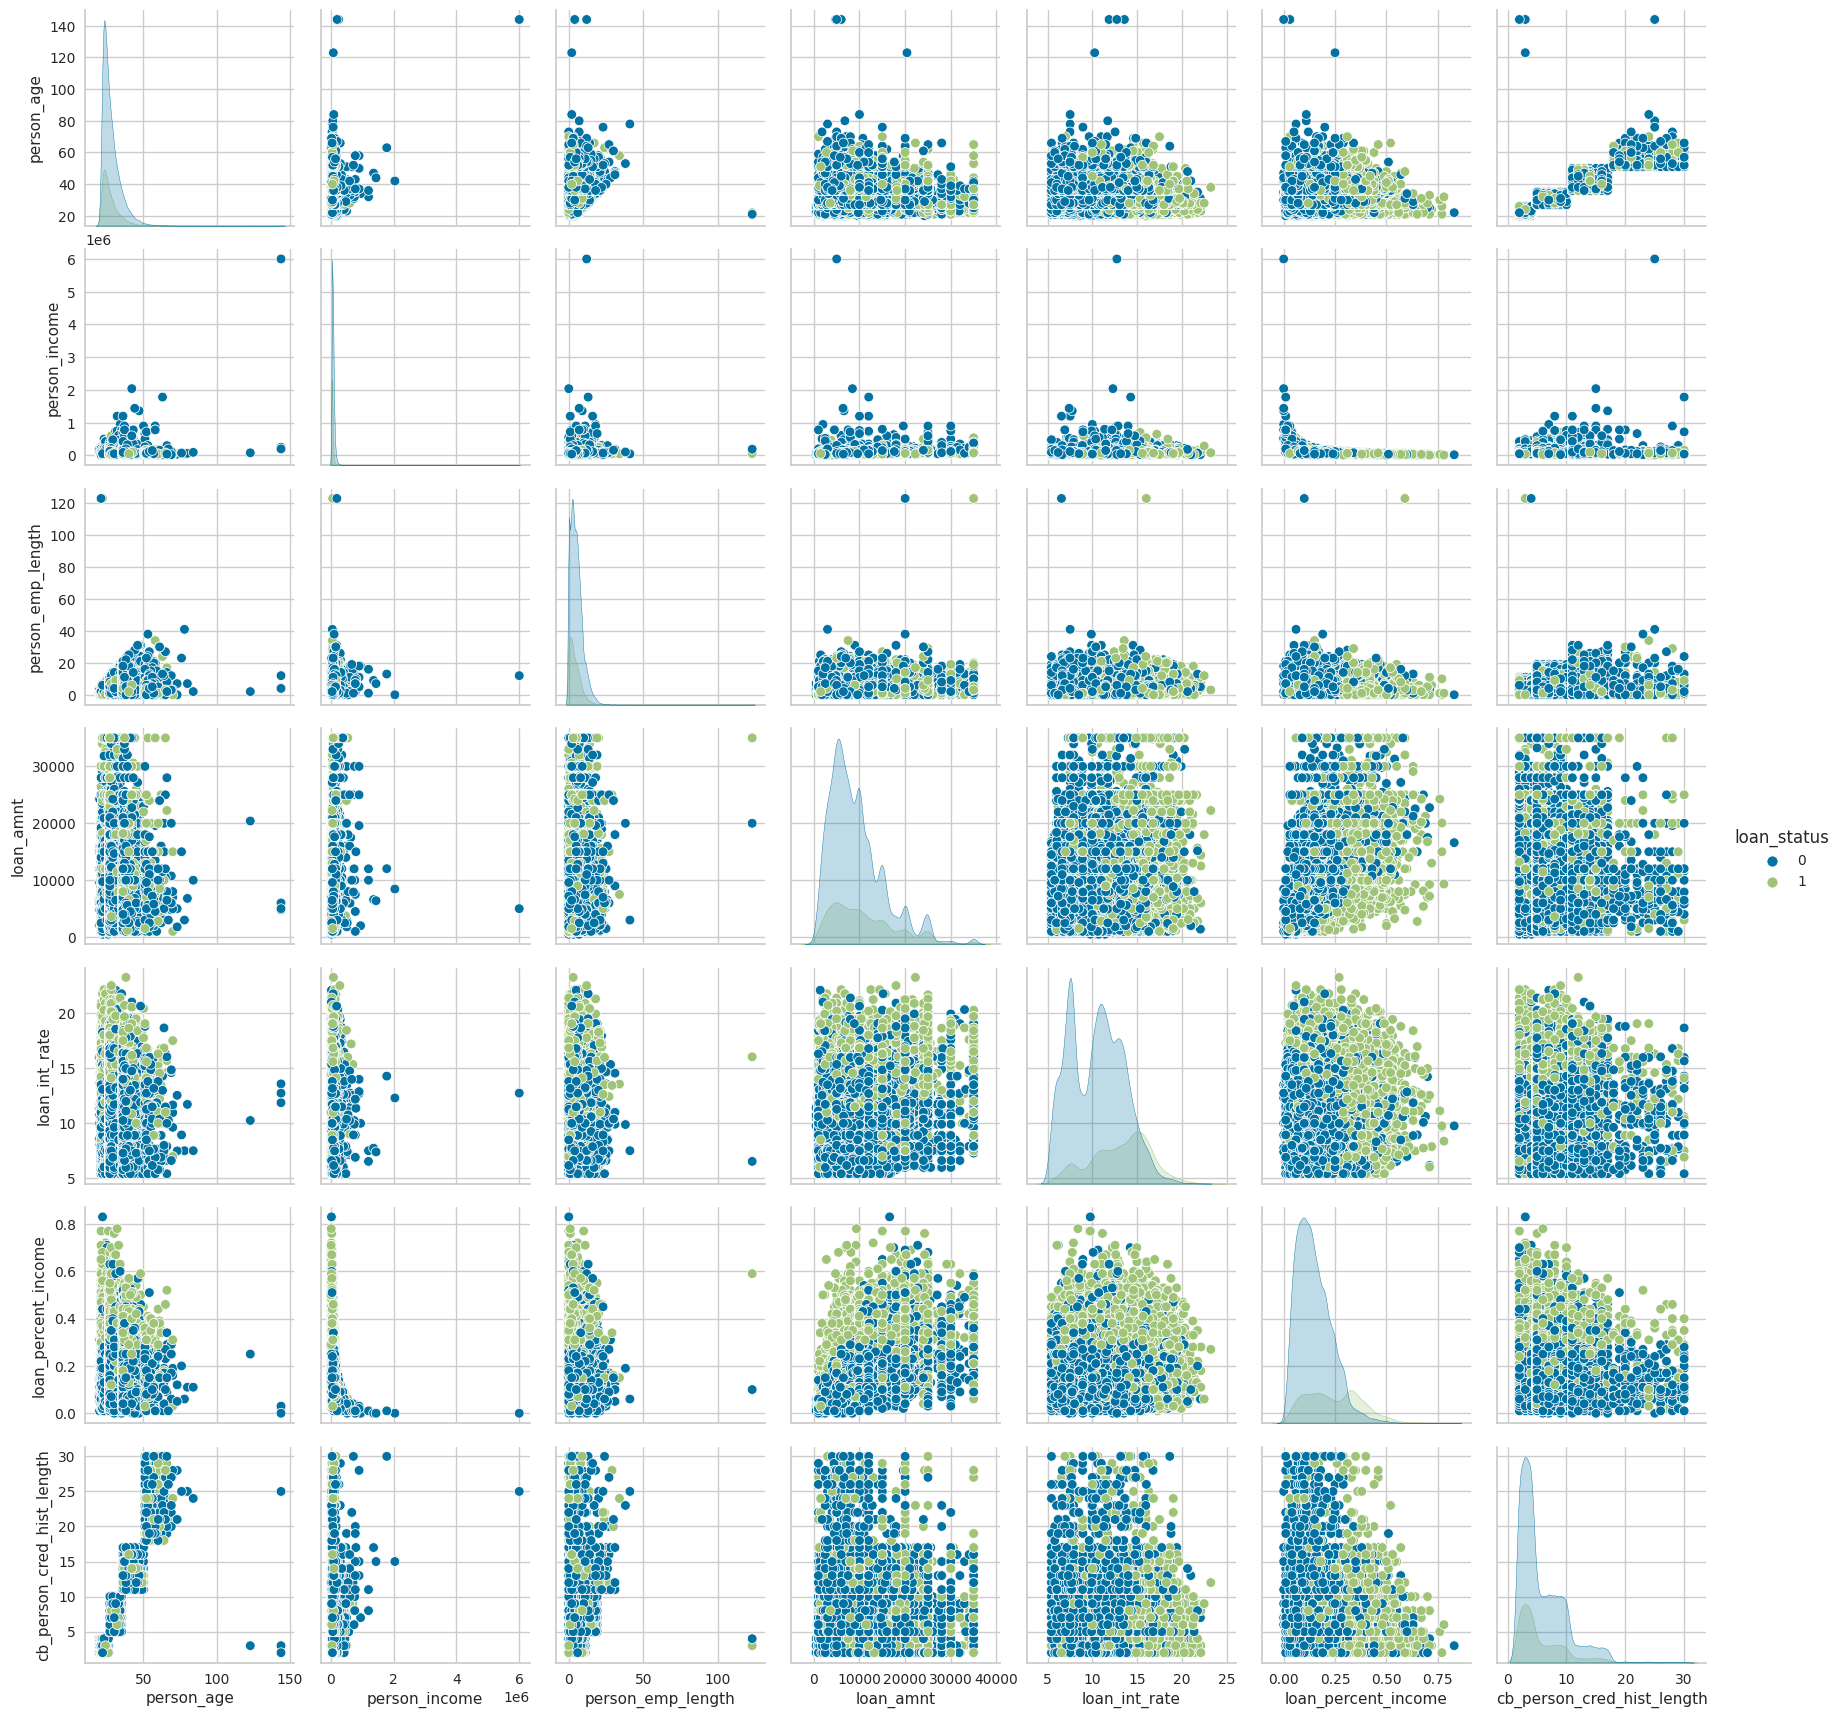

In [60]:
sns.pairplot(df, hue='loan_status')

In [61]:
df['person_age'].max()

#Assuming individuals with age > 90 to be errors
df = df.loc[df['person_age'] < 90]
df['person_emp_length'].max()

#Employment cannot be greater than the individual's age (accounting for childhood)
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

In [62]:
df.isnull().sum()
#Filling missing values with mean:
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = df['loan_int_rate'].median()
df.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = df['person_emp_length'].median()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

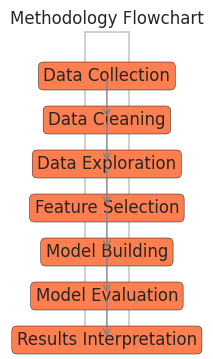

In [63]:
import matplotlib.pyplot as plt
# Create the approach flowchart
fig, ax = plt.subplots(figsize=(6, 4))
steps = [
    "Data Collection",
    "Data Cleaning",
    "Data Exploration",
    "Feature Selection",
    "Model Building",
    "Model Evaluation",
    "Results Interpretation"
]
positions = list(range(len(steps)))
step_coordinates = {}
for i, step in enumerate(steps):
    x = 0.5
    y = len(steps) - 1 - i
    step_coordinates[step] = (x, y)
    ax.text(x, y, step, ha='center', va='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.3', facecolor='coral'))
for i in range(len(steps) - 1):
    ax.annotate("", xy=step_coordinates[steps[i]], xytext=step_coordinates[steps[i+1]], arrowprops=dict(arrowstyle='<-', linewidth=1, color='grey'))
ax.set_xlim(0, 1)
ax.set_ylim(0, len(steps))
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Methodology Flowchart")
plt.show()

In [64]:
# Creating groups
df['income_group'] = pd.cut(df['person_income'], bins= [0, 25000, 50000, 75000, 100000, float('inf')], labels=['low', 'l-middle', 'middle', 'h-middle', 'high'])
df['income_group']
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins= [0, 10000, 15000, float('inf')],labels=['small', 'medium', 'large'])
df['loan_amnt_group']
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 28495, dtype: float64

In [65]:
#Spliting dataset in to Training set and Test set
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)
X_credit.columns
label_encode_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'income_group', 'loan_amnt_group']
label_encoder = LabelEncoder()

for col in label_encode_cols:
  X_credit[col] = label_encoder.fit_transform(X_credit[col])

X_credit = pd.get_dummies(X_credit, columns=label_encode_cols)
X_credit.head(1)
scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)
X_credit[0]
X_training, X_test, y_training, y_test = train_test_split(X_credit, y_credit, test_size= 0.2, random_state=0)
X_training.shape, y_training.shape

((22796, 35), (22796,))

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate the features and the target
X_credit = df.drop('loan_status', axis=1)
y_credit = df['loan_status']

# Identify categorical columns that need to be encoded
categorical_cols = X_credit.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding to categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_credit_encoded = ct.fit_transform(X_credit)

# Convert to DataFrame to view column names (optional, for understanding only)
X_credit_encoded_df = pd.DataFrame(X_credit_encoded, columns=ct.get_feature_names_out())

# Apply StandardScaler
scaler = StandardScaler()
X_credit_scaled = scaler.fit_transform(X_credit_encoded)


In [67]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayer = GaussianNB()
naive_bayer.fit(X_training, y_training)
predict_NB = naive_bayer.predict(X_test)

In [68]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
decision_tree.fit(X_training, y_training)
predict_decision_tree = decision_tree.predict(X_test)

In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state =0)
random_forest.fit(X_training, y_training)
predict_random_forest = random_forest.predict(X_test)

In [70]:
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_training, y_training)
predict_knn = knn.predict(X_test)

In [71]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1)
logistic.fit(X_training, y_training)
predict_logistic = logistic.predict(X_test)
logistic.intercept_

array([-1.96376488])

In [72]:
#SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, C=2)
svm.fit(X_training, y_training)
predict_svm = svm.predict(X_test)

Naive Bayes
Accuracy: 0.85
Precision: 0.66
Recall: 0.60
F1-Score: 0.63


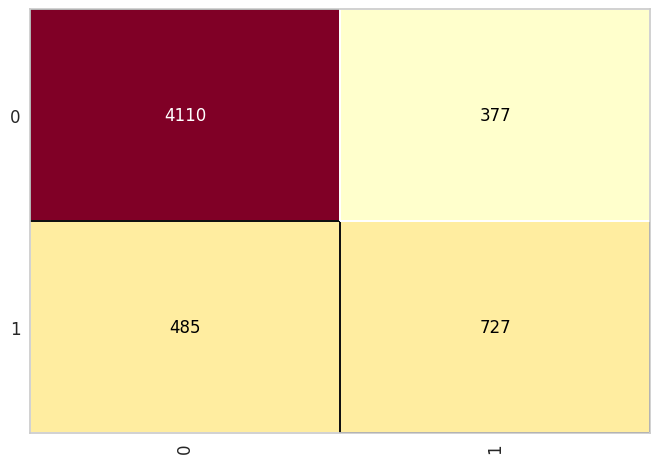

In [73]:
#Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = ConfusionMatrix(naive_bayer)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predict_NB)

# Calculate precision
precision = precision_score(y_test, predict_NB)

# Calculate recall
recall = recall_score(y_test, predict_NB)

# Calculate F1-score
f1 = f1_score(y_test, predict_NB)

print("\033[1mNaive Bayes\033[0m")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Decision Tree
Accuracy: 0.90
Precision: 0.75
Recall: 0.78
F1-Score: 0.76


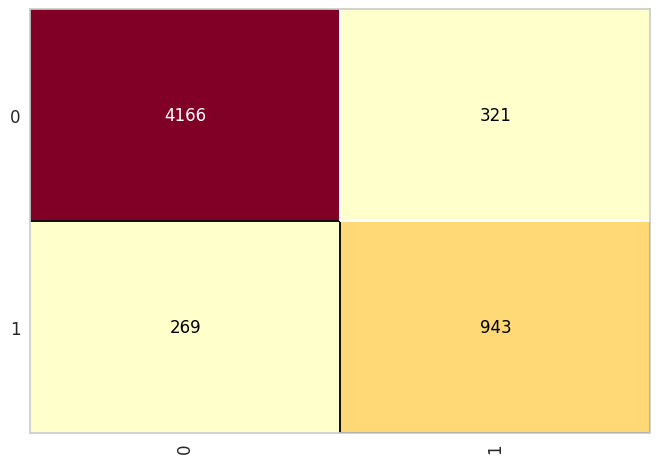

In [74]:
#Decision Tree
cm = ConfusionMatrix(decision_tree)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predict_decision_tree)

# Calculate precision
precision = precision_score(y_test, predict_decision_tree)

# Calculate recall
recall = recall_score(y_test, predict_decision_tree)

# Calculate F1-score
f1 = f1_score(y_test, predict_decision_tree)

print("\033[1mDecision Tree\033[0m")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Random Forest
Accuracy: 0.94
Precision: 0.97
Recall: 0.73
F1-Score: 0.83


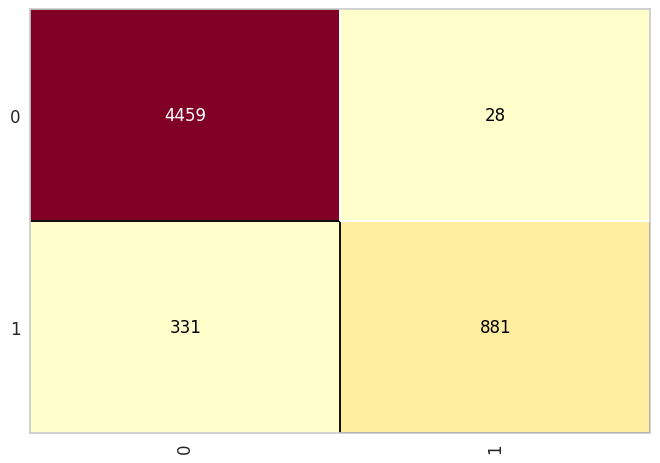

In [75]:
#Random Forest
cm = ConfusionMatrix(random_forest)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predict_random_forest)

# Calculate precision
precision = precision_score(y_test, predict_random_forest)

# Calculate recall
recall = recall_score(y_test, predict_random_forest)

# Calculate F1-score
f1 = f1_score(y_test, predict_random_forest)

print("\033[1mRandom Forest\033[0m")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Nearest Neighbors
Accuracy: 0.89
Precision: 0.83
Recall: 0.61
F1-Score: 0.70


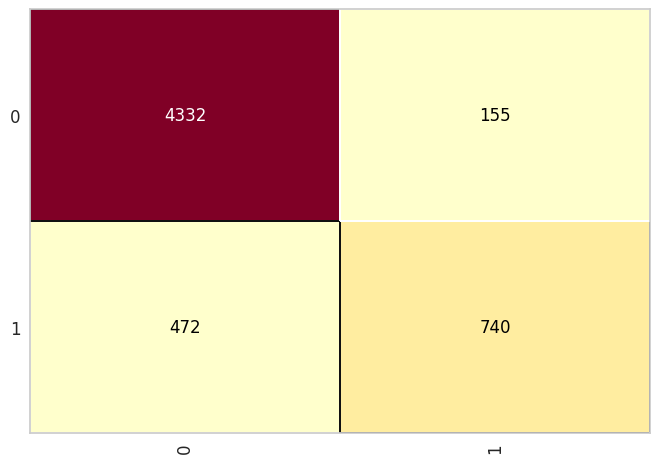

In [76]:
#Nearest Neighbors
cm = ConfusionMatrix(knn)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predict_knn)

# Calculate precision
precision = precision_score(y_test, predict_knn)

# Calculate recall
recall = recall_score(y_test, predict_knn)

# Calculate F1-score
f1 = f1_score(y_test, predict_knn)

print("\033[1mNearest Neighbors\033[0m")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Logistic Regression
Accuracy: 0.87
Precision: 0.76
Recall: 0.59
F1-Score: 0.66


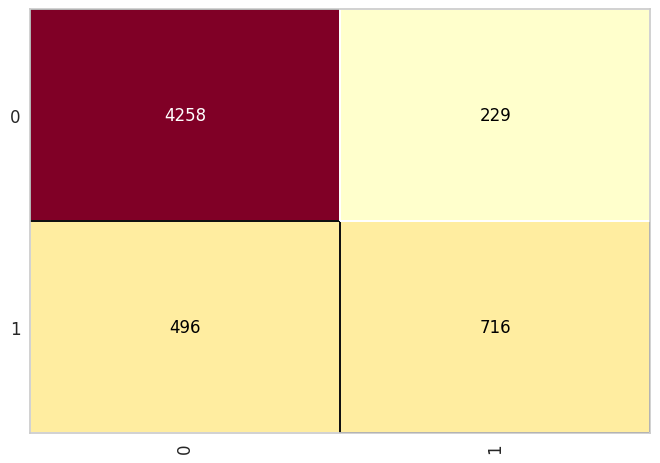

In [77]:
#Logistic Regression
cm = ConfusionMatrix(logistic)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predict_logistic)

# Calculate precision
precision = precision_score(y_test, predict_logistic)

# Calculate recall
recall = recall_score(y_test, predict_logistic)

# Calculate F1-score
f1 = f1_score(y_test, predict_logistic)

print("\033[1mLogistic Regression\033[0m")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

SVM
Accuracy: 0.92
Precision: 0.92
Recall: 0.68
F1-Score: 0.78


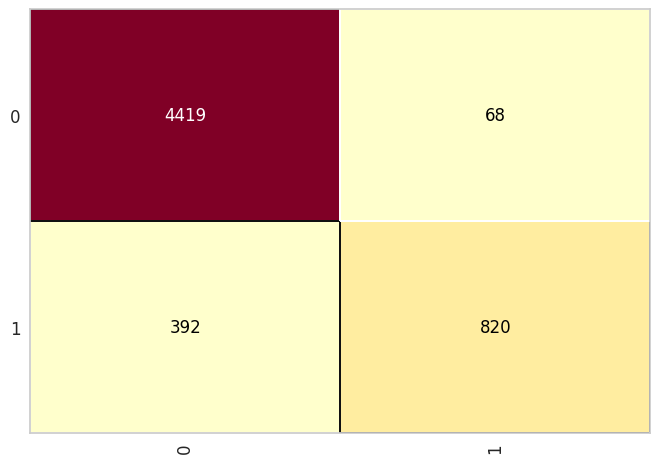

In [78]:
#SVM
cm = ConfusionMatrix(svm)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, predict_svm)

# Calculate precision
precision_svm = precision_score(y_test, predict_svm)

# Calculate recall
recall_svm = recall_score(y_test, predict_svm)

# Calculate F1-score
f1_svm = f1_score(y_test, predict_svm)

print("\033[1mSVM\033[0m")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")

In [79]:
from datetime import datetime
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate and print model performance
def evaluate_model(model, X_training, X_test, y_training, y_test):
    # Time to Train
    start_time = datetime.now()
    model.fit(X_training, y_training)
    end_time = datetime.now()
    time_to_train = end_time - start_time
    print(f"Time to Train: {time_to_train}")

    # Time to Test
    start_time = datetime.now()
    y_pred = model.predict(X_test)
    end_time = datetime.now()
    time_to_test = end_time - start_time
    print(f"Time to Test: {time_to_test}")

    # Stability using cross-validation
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)
    cross_val_results = cross_val_score(model, X_training, y_training, cv=kf, scoring='accuracy')
    print(f"Cross-validation results: {cross_val_results}")
    print(f"Mean accuracy: {cross_val_results.mean()}")
    print(f"Standard deviation of accuracy: {cross_val_results.std()}")

    # Performance Metrics on Test Set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

# Apply the function for each model
models = [naive_bayer, decision_tree, random_forest, knn, logistic, svm]
for model in models:
    print(f"\nEvaluating {model.__class__.__name__}:")
    evaluate_model(model, X_training, X_test, y_training, y_test)


Evaluating GaussianNB:
Time to Train: 0:00:00.020449
Time to Test: 0:00:00.003131
Cross-validation results: [0.86008772 0.84272867 0.85040579 0.82386488 0.84865102]
Mean accuracy: 0.845147616243944
Standard deviation of accuracy: 0.012016113956242868
Accuracy: 0.85
Precision: 0.66
Recall: 0.60
F1-Score: 0.63

Evaluating DecisionTreeClassifier:
Time to Train: 0:00:00.251747
Time to Test: 0:00:00.002126
Cross-validation results: [0.89583333 0.88484317 0.88725598 0.89537179 0.89383637]
Mean accuracy: 0.8914281275133435
Standard deviation of accuracy: 0.004506139974416258
Accuracy: 0.90
Precision: 0.75
Recall: 0.78
F1-Score: 0.76

Evaluating RandomForestClassifier:
Time to Train: 0:00:07.407496
Time to Test: 0:00:00.248385
Cross-validation results: [0.93399123 0.92827374 0.93222198 0.92980917 0.93046721]
Mean accuracy: 0.930952665442945
Standard deviation of accuracy: 0.0019780743838130666
Accuracy: 0.94
Precision: 0.97
Recall: 0.73
F1-Score: 0.83

Evaluating KNeighborsClassifier:
Time to

In [88]:
# Assuming 'random_forest' is your trained Random Forest model
feature_importances = random_forest.feature_importances_
print("Number of feature importances:", len(feature_importances))

# Check the number of features in your preprocessed dataset
print("Number of features in X_credit:", X_credit.shape[1])


Number of feature importances: 35
Number of features in X_credit: 14


In [89]:
# Assuming one-hot encoding was applied
X_credit_encoded = pd.get_dummies(X_credit)
feature_names = X_credit_encoded.columns.tolist()

# Ensure the number of features now matches
print("Number of features after encoding:", len(feature_names))


Number of features after encoding: 35


In [90]:
# Ensure feature_importances length and feature_names length match
if len(feature_importances) == len(feature_names):
    importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    importances_df.sort_values(by='importance', ascending=False, inplace=True)
    print(importances_df)
else:
    print("Mismatch in the number of features. Please check the preprocessing steps.")


                           feature  importance
7                   loan_to_income    0.139327
4                    loan_int_rate    0.116507
5              loan_percent_income    0.105710
1                    person_income    0.101846
3                        loan_amnt    0.056198
2                person_emp_length    0.055696
11      person_home_ownership_RENT    0.053367
0                       person_age    0.043491
21                    loan_grade_D    0.042896
6       cb_person_cred_hist_length    0.035300
8   person_home_ownership_MORTGAGE    0.027412
10       person_home_ownership_OWN    0.021733
12   loan_intent_DEBTCONSOLIDATION    0.019537
20                    loan_grade_C    0.017753
15             loan_intent_MEDICAL    0.016498
18                    loan_grade_A    0.014920
14     loan_intent_HOMEIMPROVEMENT    0.013487
17             loan_intent_VENTURE    0.012215
22                    loan_grade_E    0.011800
13           loan_intent_EDUCATION    0.010729
30           

Hyperparameter Tuning for SVC****

Analyze Feature Importances

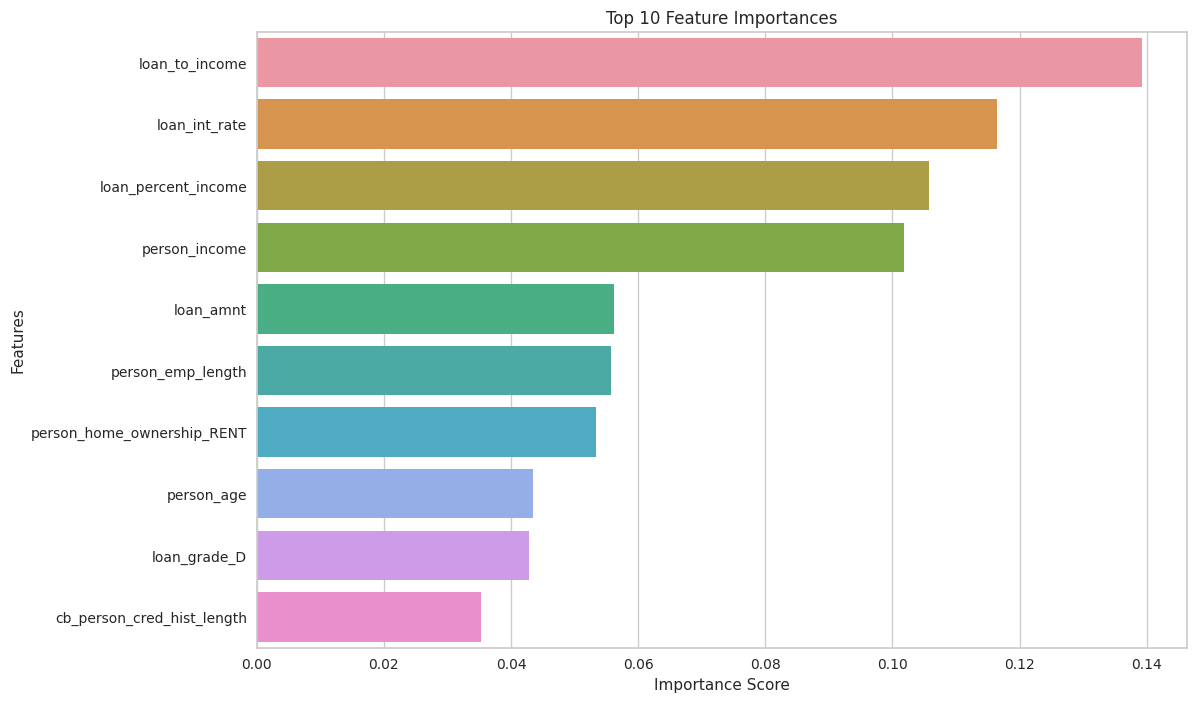

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Model Tuning

In [93]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
grid_search.fit(X_training, y_training)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'n_estimators': 300}
Best score: 0.9309526365815834


Apply the Best Parameters to the Model
Take the best parameters from the gr

In [94]:
best_params = grid_search.best_params_
best_forest = RandomForestClassifier(**best_params, random_state=42)
best_forest.fit(X_training, y_training)


RandomForestClassifier(n_estimators=300, random_state=42)

Evaluate the Model

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions on the test set
y_pred = best_forest.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4487
           1       0.97      0.72      0.83      1212

    accuracy                           0.94      5699
   macro avg       0.95      0.86      0.90      5699
weighted avg       0.94      0.94      0.93      5699

Accuracy: 0.9370064923670819
Confusion Matrix:
 [[4463   24]
 [ 335  877]]


Cross-Validation with the Best Parameters

In [96]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_forest, X_training, y_training, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.93464912 0.93024786 0.9337574  0.92937048 0.92673832]
Mean CV accuracy: 0.9309526365815834


Feature Importances Re-evaluation

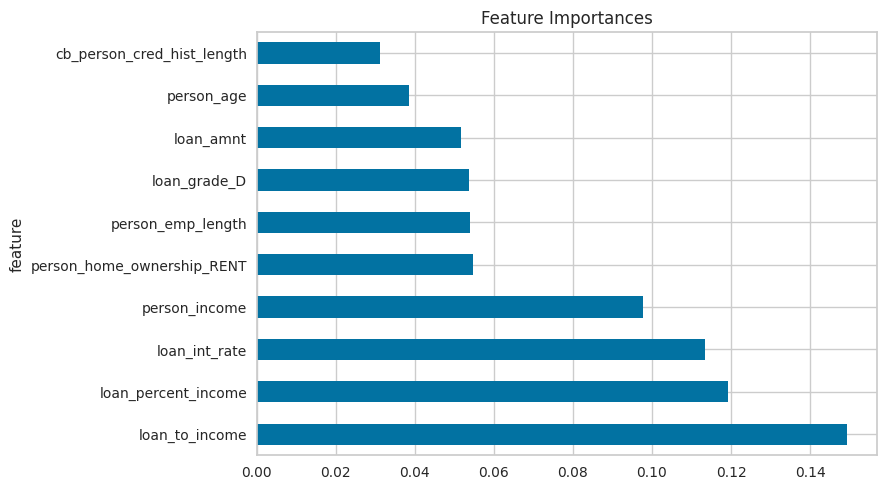

In [97]:
# Get feature importances
best_feature_importances = best_forest.feature_importances_
importances_df = pd.DataFrame({'feature': feature_names, 'importance': best_feature_importances})
importances_df.sort_values(by='importance', ascending=False, inplace=True)

# Plot the feature importances
importances_df.head(10).plot(kind='barh', x='feature', y='importance', legend=None)
plt.title('Feature Importances')
plt.show()


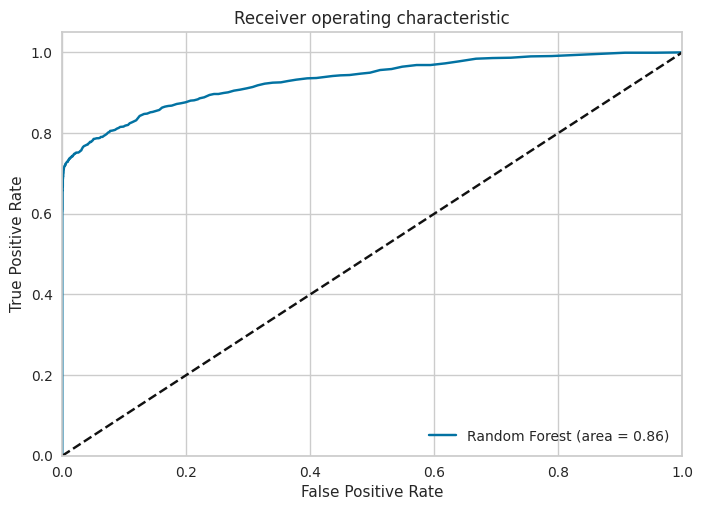

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_pred are the predictions from the best_forest model
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, best_forest.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


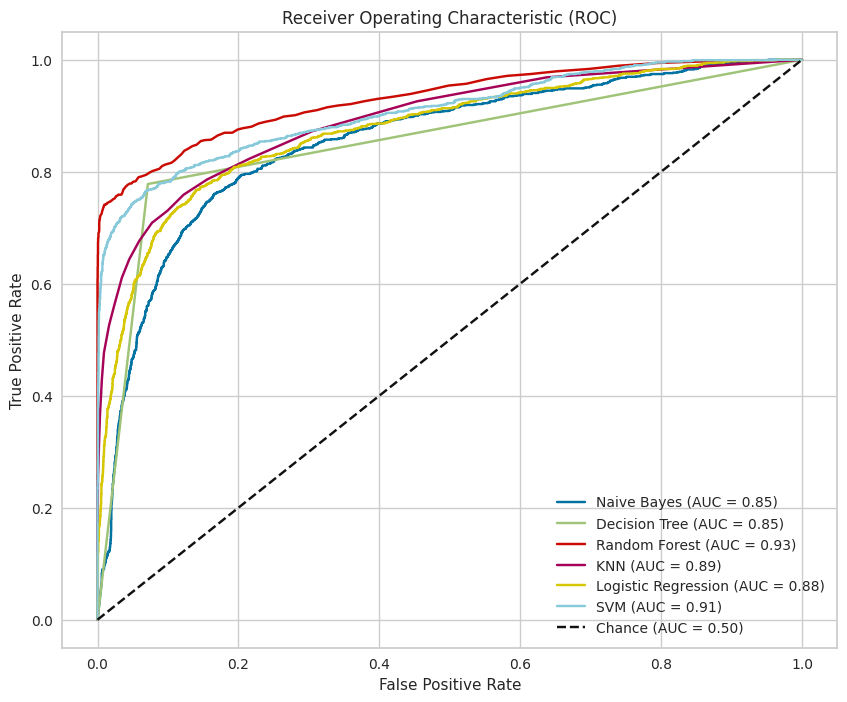

In [101]:
from sklearn.svm import SVC

# Assuming X_training and y_training are your training feature set and labels
# Retrain the SVM with probability estimates
svm = SVC(kernel='rbf', random_state=1, C=2, probability=True)
svm.fit(X_training, y_training)

# Now you can replace the old SVM model in the trained_models dictionary
trained_models['SVM'] = svm

# And call the plot_roc_curves function again
plot_roc_curves(X_test, y_test, trained_models)
